In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def preprocess_image(filename):
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, image = cv2.threshold(image, 210, 255, cv2.THRESH_BINARY)
    binary_image = image / 255
    return binary_image

In [5]:
# points is a starting coordinate --> [y,x]
def count_pixel(binary_image, points):
    y = points[0]
    x = points[1]
    no_of_pixels = 0
    
    while binary_image[y,x] == 1:
        y += 1
        no_of_pixels += 1
    
    return no_of_pixels

In [6]:
def height_inverse(binary_image, starting_points):
    heights = []
    for points in starting_points:
        height = count_pixel(binary_image, points)
        heights.append(height)
    
    return np.array(heights)

In [7]:
# inverse_height has to be a numpy array
def actual_height(inverse_height):
    return 302-inverse_height

In [8]:
def pixel_to_mm(value):
    return value*0.828

In [9]:
cam1_points = [[90,200], [72,400], [70,600], [75,800], [82,1000]]     # 5 points

# approximation
upper_bounds_cam1 = [[90,200], [85,225], [82,250], [80,275], 
                     [78,300], [75,325], [73,350], [73,375],
                     [72,400], [71,425], [71,450], [71,475],
                     [70,500], [70,525], [70,550], [70,575],
                     [70,600], [70,625], [70,650], [70,675],
                     [70,700], [70,725], [70,750], [70,775],
                     [75,800], [73,825], [75,850], [76,875],
                     [77,900], [78,925], [78,950], [81,975],
                     [82,1000],]

cam1_points = np.array(cam1_points)
upper_bounds_cam1 = np.array(upper_bounds_cam1)

In [10]:
binary_image = preprocess_image('CCFL002_1_2000_500_up_cam1_a_post.jpg')
heights = height_inverse(binary_image, cam1_points)
heights = actual_height(heights)
heights = pixel_to_mm(heights)

In [11]:
heights

array([42.228, 26.496, 13.248, 14.076, 17.388])

In [31]:
binary_image = preprocess_image('CCFL002_1_2000_500_up_cam1_a_post.jpg')
heights = height_inverse(binary_image, upper_bounds_cam1)
heights = actual_height(heights)

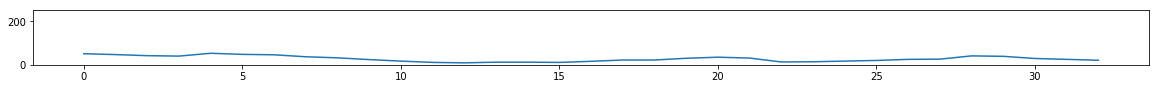

In [32]:
plt.figure(figsize=(20,1))
plt.ylim([0,250])
plt.plot(heights)

In [28]:
binary_image = preprocess_image('CCFL002_1_2000_500_up_cam1_a_pre.jpg')
heights = height_inverse(binary_image, upper_bounds_cam1)
heights = actual_height(heights)
heights = pixel_to_mm(heights)

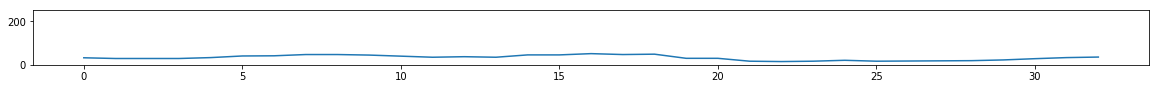

In [29]:
plt.figure(figsize=(20,1))
plt.ylim([0,250])
plt.plot(heights)

In [30]:
heights

array([32.292, 28.98 , 28.98 , 28.98 , 33.12 , 40.572, 41.4  , 47.196,
       47.196, 44.712, 39.744, 34.776, 37.26 , 34.776, 45.54 , 45.54 ,
       51.336, 47.196, 48.852, 29.808, 29.808, 16.56 , 14.904, 16.56 ,
       20.7  , 16.56 , 17.388, 18.216, 19.044, 22.356, 28.152, 33.12 ,
       35.604])